This notebook is for the tasks of the applied statistics module. Completed by Patrick Foley.

Task 1: Permutations and Combinations

In [66]:
#IMPORTS
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

Declaring the variables required for the cobinations formula.

C(n,k)= n!/k!(n−k)
​	

Where n is the total number of cups, and k is the no of cups with milk/ tea added first

In [67]:
#total cups
no_cups = 12

#cups with milk added first
no_cups_milk_first = 6

#cups with tea added first
no_cups_tea_first = 6

Using the math.comb to execute the combinations formula. We can find the total number of ways 6 cups with milk added first can be chosen from 12 total cups.

In [68]:
#math.comb for combinations formula
correct_cups = math.comb(no_cups, no_cups_milk_first)

print(correct_cups)

924


There is only one correct combination of cups that can be selceted.
So the probability of selecting this when assumed they have no super powers will be 1/correct_cups.

In [69]:
probability = 1/correct_cups

print(probability)

0.0010822510822510823


Now we must calculate the probality of getting 5 or more correct, ie. allowing for 1 mistake.
We will do this the long way and create list of every possible way that six random cups can be selected.

First we create a list of cup labels;

In [70]:
#decalre variable for 5 correct cups
labels = list(range(no_cups))

print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Then using the itertools.combindations method we can iterate over the labels and create a list of every possible different way 6 cups can be selected from 12 labelled cups.

In [71]:
combs = list(itertools.combinations(labels,no_cups_milk_first))

combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

We find the length of this list, ie. how many different ways exist

In [72]:
len(combs)

924

This will randomly select 6 cups from the labels list. As if we were selecting without superpowers.
Using the random library in python.
The set() function will create a collection of unique elements in this case all unique combinations of selecting 6 out of 12 numbers unordered.

In [73]:
labels_milk_first = random.sample(labels, no_cups_milk_first)

labels_milk_first.sort

#create a set 
set(labels_milk_first)


{1, 2, 5, 7, 10, 11}

Here we create a for loop where for every combinitation in the combs list we will make it into a set then find any overlap of our random selection labels_milk_first. We then print how many numbers overlapped between the random unique selections and the total combinations len(overlap). 


In [74]:
#create an empty list
no_overlaps = []

for comb in combs:
  
  s1 = set(comb)
  
  s2 = set(labels_milk_first)

  overlap = s1.intersection(s2)

  print(comb, overlap, len(overlap))
#Append each length of the overlapped numbers to out empty list
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 2, 5} 3
(0, 1, 2, 3, 4, 6) {1, 2} 2
(0, 1, 2, 3, 4, 7) {1, 2, 7} 3
(0, 1, 2, 3, 4, 8) {1, 2} 2
(0, 1, 2, 3, 4, 9) {1, 2} 2
(0, 1, 2, 3, 4, 10) {1, 2, 10} 3
(0, 1, 2, 3, 4, 11) {1, 2, 11} 3
(0, 1, 2, 3, 5, 6) {1, 2, 5} 3
(0, 1, 2, 3, 5, 7) {1, 2, 5, 7} 4
(0, 1, 2, 3, 5, 8) {1, 2, 5} 3
(0, 1, 2, 3, 5, 9) {1, 2, 5} 3
(0, 1, 2, 3, 5, 10) {1, 2, 10, 5} 4
(0, 1, 2, 3, 5, 11) {1, 2, 11, 5} 4
(0, 1, 2, 3, 6, 7) {1, 2, 7} 3
(0, 1, 2, 3, 6, 8) {1, 2} 2
(0, 1, 2, 3, 6, 9) {1, 2} 2
(0, 1, 2, 3, 6, 10) {1, 2, 10} 3
(0, 1, 2, 3, 6, 11) {1, 2, 11} 3
(0, 1, 2, 3, 7, 8) {1, 2, 7} 3
(0, 1, 2, 3, 7, 9) {1, 2, 7} 3
(0, 1, 2, 3, 7, 10) {1, 2, 10, 7} 4
(0, 1, 2, 3, 7, 11) {1, 2, 11, 7} 4
(0, 1, 2, 3, 8, 9) {1, 2} 2
(0, 1, 2, 3, 8, 10) {1, 2, 10} 3
(0, 1, 2, 3, 8, 11) {1, 2, 11} 3
(0, 1, 2, 3, 9, 10) {1, 2, 10} 3
(0, 1, 2, 3, 9, 11) {1, 2, 11} 3
(0, 1, 2, 3, 10, 11) {11, 1, 2, 10} 4
(0, 1, 2, 4, 5, 6) {1, 2, 5} 3
(0, 1, 2, 4, 5, 7) {1, 2, 5, 7} 4
(0, 1, 2, 4, 5, 8) {1, 2, 5} 3
(0, 1, 2

In [75]:
#The length of each every overlap that can occur between each set from above.
#In other words each number represents the amount of cups the lady will guess right when randomly selecting 6 from 12.
no_overlaps

[3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 3,
 4,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 3,
 3,


We then create a numpy array with number of times a length of an overlap occured.

In [76]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

Using matplotlib we can plot the number of times each amount is guessed. It is a normal distribution.

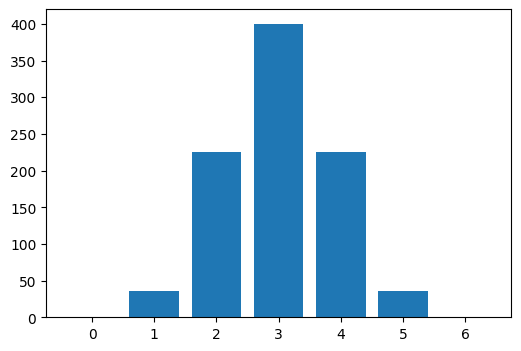

In [77]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

In [78]:
# Given counts tuple
counts = (np.array([0, 1, 2, 3, 4, 5, 6]), np.array([1, 36, 225, 400, 225, 36, 1]))

# Convert the arrays to lists
unique_values_list = counts[0].tolist()
occurrences_list = counts[1].tolist()

# Find the index of 5 in the unique values list
index_of_five = unique_values_list.index(5)

# Get the number of occurrences of 5
count_five = occurrences_list[index_of_five]

# Print the result
print(count_five)  # This will give the number of times 

36


We can see from the counts arrays that 5 overlaps occurs 36 times total. This is also illustrated in the graph above.

Now we must find the probabilty of selecting 5 cups correclty and/or 6 cups correctly.

In [79]:
correct_combo = 1
prob5or6 = (count_five + correct_combo) / correct_cups

In [80]:
prob5or6

0.04004329004329004

This can also be done a much quicker way like s using math.comb method:

In [81]:
# Calculate the combinations for guessing exactly 5 cups correctly
comb_5_correct = math.comb(6, 5) * math.comb(6, 1)

# Total combinations already calculated (C(12, 6))
# Probability of guessing 5 or 6 correct cups
prob_5_or_more_correct = (comb_5_correct + correct_combo) / correct_cups

# Display the results
print(f"Combinations for exactly 5 correct: {comb_5_correct}")
print(f"Probability of guessing at least 5 correctly: {prob_5_or_more_correct:.6f}")


Combinations for exactly 5 correct: 36
Probability of guessing at least 5 correctly: 0.040043
